# Classify Irises

In this laboration we will try to build a neural net to identify what type of Iris a flower is. We will also evaluate the Artificial Neural Net by comparing it to other methods.

The dataset is a classical dataset in machinelearning collected in 1936 by Edgar Anderson and first published by Ronald Fisher. By measuring the sepal width, sepal length, petal width and petal length Fisher tried to specify differences between the spicies.

This is a simple example and often used when teaching ML algorithms. Since it contains of a reasonable amount of parameters it is easy to understand the data. It is also very good in the sense that there are some overlaps that might be very hard to detect accuratly. It therefor illustrates the complexity of building an AI that that has a accuracy of 100%.


![alt text](https://cdn-images-1.medium.com/max/2560/1*7bnLKsChXq94QjtAiRn40w.png "Three types of Irises the we want to classify.")

As you see those flowers are quite similar. Compared to a botanist the NN might not be perfect. But compared to someone who tries to identify the flower based on a flower book it might be quite accurate. Let's see how to do it.

In [20]:
# First we load all libraries needed for this notebook
 
import pandas as pd # Load the Pandas libraries with alias 'pd'
import tensorflow as tf # A library developed by google making GPU calculations simple
import seaborn as sns # A nice library for plotting, alternative to matplotlib

from sklearn.preprocessing import normalize #
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from matplotlib import pyplot as plt

In [21]:
# Read data from file iris.csv' from the data folder
# Open the csv to see the data
data = pd.read_csv("./data/iris.csv") 
# Preview the last 10 lines of the loaded data 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data
Before starting to do any modifications of the data or attempts to build some kind of AI/ML model. We must understand the data. This explorative phase is very important in order to succesful build a model. 

One method in the pandas.DataFrame class is the `describe` method which shows some statistical information about each column.

In [22]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


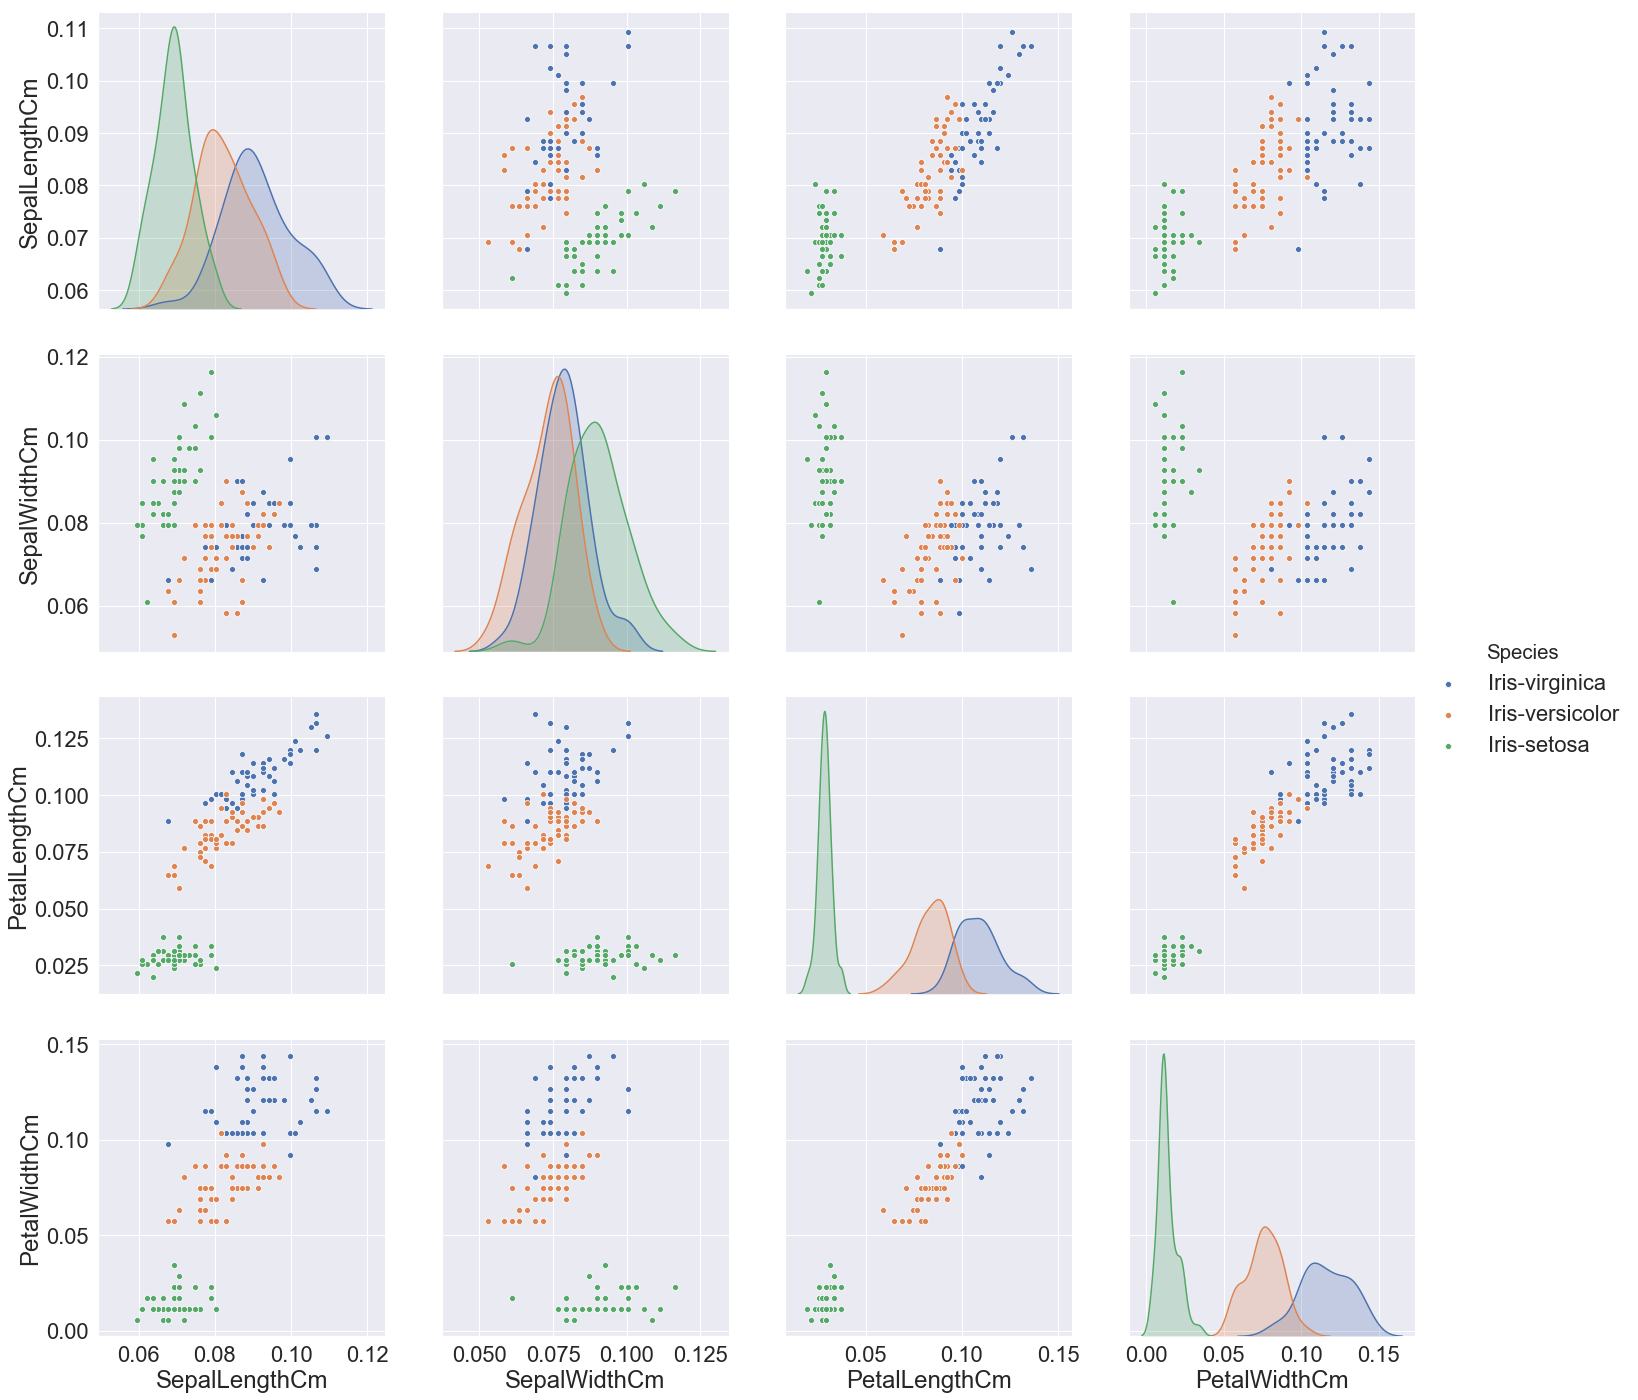

In [100]:
cols=data.columns
sns.set(font_scale=2)
sns.pairplot(vars=cols[:-1], data=data, hue='Species', height=5)
plt.show()

### Delete data
By reading the data we can se that the parameter "Id" has a very strong correlation with the type of Iris. This is a pure artificial correlation existing only because of the structure of the data. Where all Iris-Setosa are in the beginning of the dataset.

Id should therefor be deleted. One way to do this is with the `pop` method included in the dataframe class.


In [101]:
#data.pop('Unnamed: 32')
try:
    data.pop('Id')
except:
    print('Id already deleted')
data.head(n=10)

Id already deleted


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.088549,0.082062,0.108218,0.103527,Iris-virginica
1,0.074713,0.079415,0.088542,0.086272,Iris-versicolor
2,0.084398,0.079415,0.090510,0.080521,Iris-versicolor
3,0.066412,0.082062,0.031482,0.011503,Iris-setosa
4,0.066412,0.090003,0.037384,0.011503,Iris-setosa
5,0.080248,0.074121,0.100348,0.138036,Iris-virginica
6,0.069179,0.087356,0.027546,0.011503,Iris-setosa
7,0.067795,0.082062,0.029514,0.005751,Iris-setosa
8,0.098234,0.079415,0.116089,0.120781,Iris-virginica
9,0.066412,0.090003,0.031482,0.011503,Iris-setosa


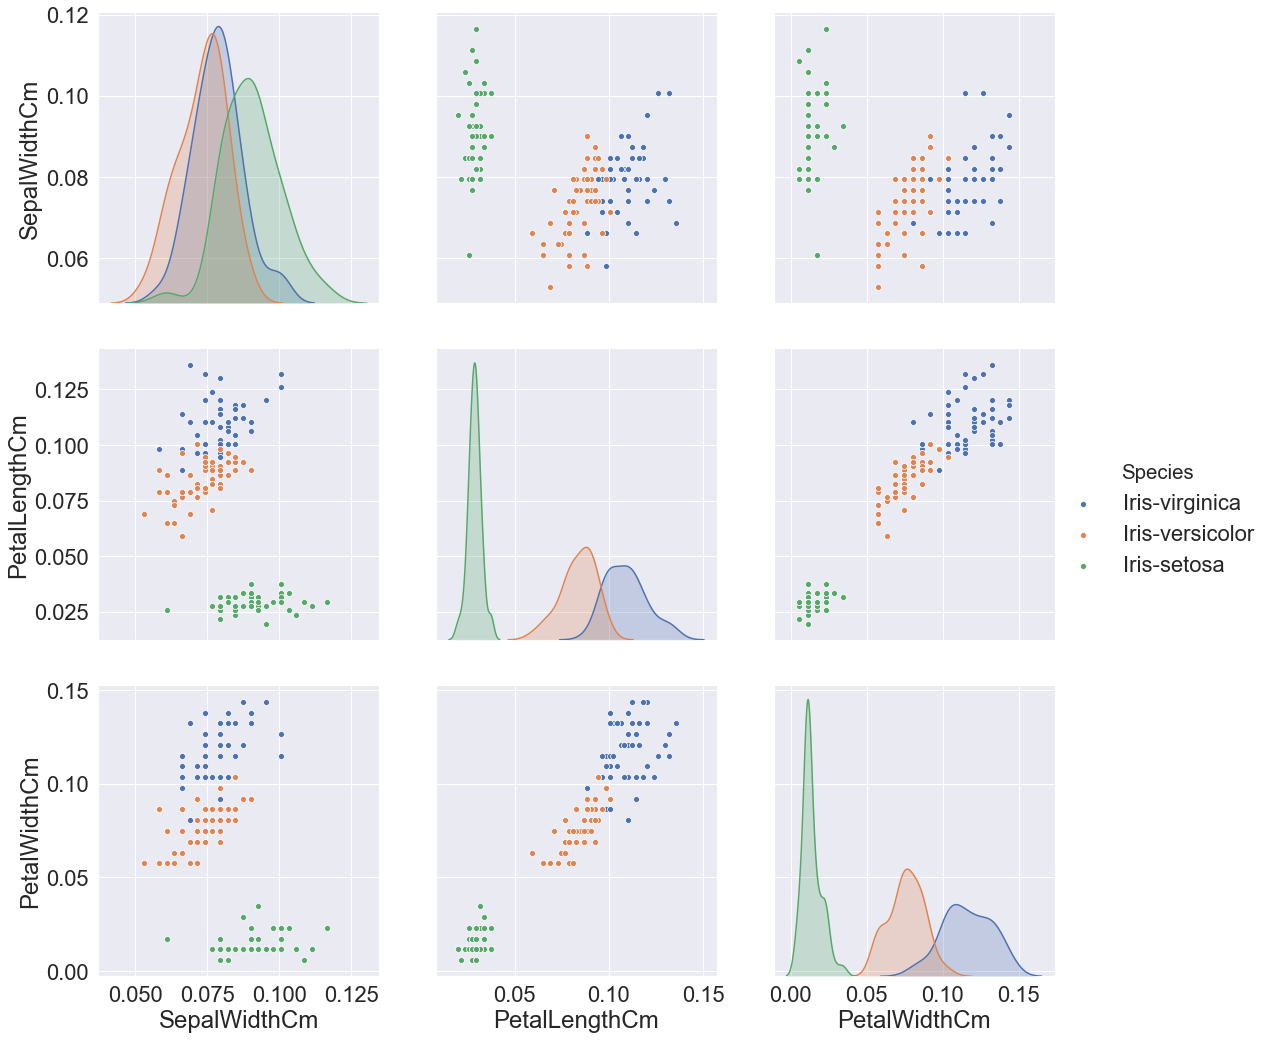

In [102]:
sns.pairplot(vars=cols[1:-1], data=data, hue='Species', height=5)
plt.show()

# Correlation of data
One method to analyze how well one variable describes another variable is by correlations.

$\rho(x,y)=\frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}$

The correlation is a method included in the dataframe `corr`. 

In [103]:
# Write the syntax here:
corr = data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


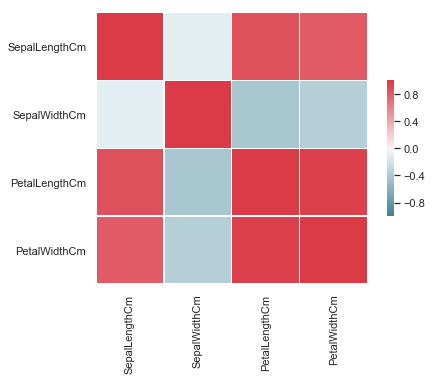

In [104]:
import numpy as np
# Set up the matplotlib figure
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1,vmin=-1, center=0,# mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

From the the figure and table aboove we can see that two of the variables are well correlated. That means it is quite likely that two of the well correlated variables could be deleted without impacting the accuracy of the model.


In [31]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=3)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=3)

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.0906 - acc: 0.6667 - val_loss: 1.0803 - val_acc: 0.6667
Epoch 2/300
120/120 [==============================] - 0s 100us/sample - loss: 1.0743 - acc: 0.6667 - val_loss: 1.0655 - val_acc: 0.6667
Epoch 3/300
120/120 [==============================] - 0s 66us/sample - loss: 1.0583 - acc: 0.6667 - val_loss: 1.0483 - val_acc: 0.6667
Epoch 4/300
120/120 [==============================] - 0s 91us/sample - loss: 1.0412 - acc: 0.6667 - val_loss: 1.0286 - val_acc: 0.6667
Epoch 5/300
120/120 [==============================] - 0s 91us/sample - loss: 1.0191 - acc: 0.6667 - val_loss: 1.0050 - val_acc: 0.6667
Epoch 6/300
120/120 [==============================] - 0s 91us/sample - loss: 0.9929 - acc: 0.6667 - val_loss: 0.9780 - val_acc: 0.6667
Epoch 7/300
120/120 [==============================] - 0s 100us/sample - loss: 0.9625 - acc: 0.6833 - val_loss: 0.9452 - val_acc: 0.7000
Ep

120/120 [==============================] - 0s 100us/sample - loss: 0.0988 - acc: 0.9667 - val_loss: 0.1262 - val_acc: 1.0000
Epoch 61/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0968 - acc: 0.9583 - val_loss: 0.1197 - val_acc: 0.9667
Epoch 62/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0905 - acc: 0.9500 - val_loss: 0.1201 - val_acc: 0.9667
Epoch 63/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0903 - acc: 0.9583 - val_loss: 0.1169 - val_acc: 0.9667
Epoch 64/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0895 - acc: 0.9583 - val_loss: 0.1177 - val_acc: 0.9667
Epoch 65/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0907 - acc: 0.9500 - val_loss: 0.1156 - val_acc: 0.9667
Epoch 66/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0931 - acc: 0.9750 - val_loss: 0.1131 - val_acc: 0.9667
Epoch 67/300
120/120 [==========================

120/120 [==============================] - 0s 83us/sample - loss: 0.0701 - acc: 0.9667 - val_loss: 0.0839 - val_acc: 0.9667
Epoch 120/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0676 - acc: 0.9667 - val_loss: 0.0979 - val_acc: 0.9667
Epoch 121/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0650 - acc: 0.9667 - val_loss: 0.0825 - val_acc: 0.9667
Epoch 122/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0739 - acc: 0.9667 - val_loss: 0.0889 - val_acc: 1.0000
Epoch 123/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0578 - acc: 0.9667 - val_loss: 0.0864 - val_acc: 0.9667
Epoch 124/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0694 - acc: 0.9667 - val_loss: 0.0810 - val_acc: 0.9667
Epoch 125/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0629 - acc: 0.9750 - val_loss: 0.0813 - val_acc: 0.9667
Epoch 126/300
120/120 [===================

Epoch 178/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0805 - acc: 0.9583 - val_loss: 0.0930 - val_acc: 0.9667
Epoch 179/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0870 - acc: 0.9417 - val_loss: 0.1381 - val_acc: 0.9667
Epoch 180/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0779 - acc: 0.9750 - val_loss: 0.0716 - val_acc: 0.9667
Epoch 181/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0774 - acc: 0.9583 - val_loss: 0.1057 - val_acc: 0.9667
Epoch 182/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0605 - acc: 0.9833 - val_loss: 0.0777 - val_acc: 0.9667
Epoch 183/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0610 - acc: 0.9750 - val_loss: 0.0741 - val_acc: 0.9667
Epoch 184/300
120/120 [==============================] - 0s 116us/sample - loss: 0.0563 - acc: 0.9750 - val_loss: 0.0745 - val_acc: 0.9667
Epoch 185/300
120/120 [=====

Epoch 237/300
120/120 [==============================] - 0s 150us/sample - loss: 0.0778 - acc: 0.9667 - val_loss: 0.0832 - val_acc: 1.0000
Epoch 238/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0641 - acc: 0.9667 - val_loss: 0.1068 - val_acc: 0.9667
Epoch 239/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0798 - acc: 0.9583 - val_loss: 0.0667 - val_acc: 0.9667
Epoch 240/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0532 - acc: 0.9750 - val_loss: 0.0769 - val_acc: 1.0000
Epoch 241/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0567 - acc: 0.9667 - val_loss: 0.0671 - val_acc: 0.9667
Epoch 242/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0486 - acc: 0.9750 - val_loss: 0.0700 - val_acc: 0.9667
Epoch 243/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0678 - acc: 0.9583 - val_loss: 0.0683 - val_acc: 0.9667
Epoch 244/300
120/120 [======

120/120 [==============================] - 0s 100us/sample - loss: 0.0561 - acc: 0.9750 - val_loss: 0.0659 - val_acc: 0.9667
Epoch 297/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0542 - acc: 0.9667 - val_loss: 0.0724 - val_acc: 1.0000
Epoch 298/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0543 - acc: 0.9750 - val_loss: 0.0629 - val_acc: 0.9667
Epoch 299/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0510 - acc: 0.9750 - val_loss: 0.0633 - val_acc: 0.9667
Epoch 300/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0511 - acc: 0.9750 - val_loss: 0.0629 - val_acc: 0.9667


#### Validate results
By looking output from the model fit. We can se that the accuracy of training data keeps raising throuout the process of finding constants for each neuron in the net. However looking att the accuracy of the validation set there is some kind of maximum after quite few iteration. 

We can for a reasonable high amount epochs by plotting the history of the accuracy and loss. What is a reasonable amount of epochs?

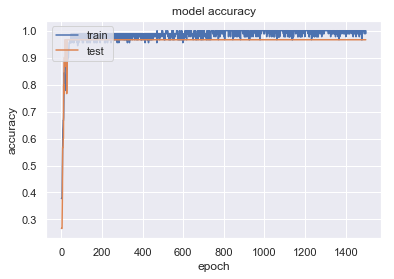

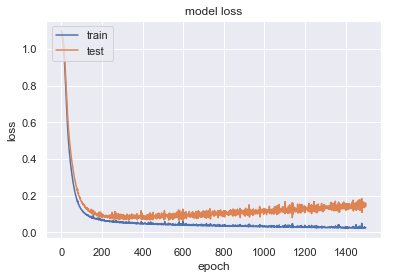

In [105]:
# summarize history for accuracy
sns.set(font_scale=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

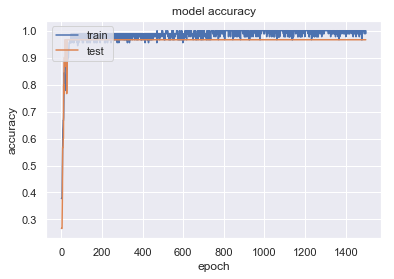

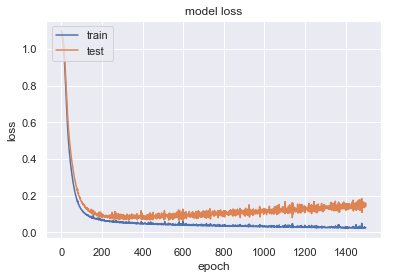

In [107]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Better net?
In the example above there are quite a lot of neurons in each layer of the net. What happens if we follow the rule of thumb and use somewhere between the amount of outputs classes and number of input variables in each layer? 

Do we see any diffrence in the loss and accuracy? 

In [108]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.7*total_length)
test_length = int(0.3*total_length)
# valid_length = int(0.15*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=3)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=3)

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(6,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 1.0878 - acc: 0.3619 - val_loss: 1.1002 - val_acc: 0.2444
Epoch 2/300
105/105 [==============================] - 0s 104us/sample - loss: 1.0892 - acc: 0.3429 - val_loss: 1.0995 - val_acc: 0.2444
Epoch 3/300
105/105 [==============================] - 0s 104us/sample - loss: 1.0864 - acc: 0.4000 - val_loss: 1.0991 - val_acc: 0.2444
Epoch 4/300
105/105 [==============================] - 0s 104us/sample - loss: 1.0906 - acc: 0.3333 - val_loss: 1.0988 - val_acc: 0.2444
Epoch 5/300
105/105 [==============================] - 0s 114us/sample - loss: 1.0850 - acc: 0.4095 - val_loss: 1.0986 - val_acc: 0.2444
Epoch 6/300
105/105 [==============================] - 0s 95us/sample - loss: 1.0853 - acc: 0.3905 - val_loss: 1.0985 - val_acc: 0.2444
Epoch 7/300
105/105 [==============================] - 0s 85us/sample - loss: 1.0862 - acc: 0.4095 - val_loss: 1.0986 - val_acc: 0.2444


105/105 [==============================] - 0s 104us/sample - loss: 1.0481 - acc: 0.4857 - val_loss: 1.0698 - val_acc: 0.3111
Epoch 61/300
105/105 [==============================] - 0s 104us/sample - loss: 1.0510 - acc: 0.4857 - val_loss: 1.0691 - val_acc: 0.3111
Epoch 62/300
105/105 [==============================] - 0s 95us/sample - loss: 1.0471 - acc: 0.4762 - val_loss: 1.0679 - val_acc: 0.3556
Epoch 63/300
105/105 [==============================] - 0s 105us/sample - loss: 1.0456 - acc: 0.4857 - val_loss: 1.0670 - val_acc: 0.3778
Epoch 64/300
105/105 [==============================] - 0s 95us/sample - loss: 1.0462 - acc: 0.5333 - val_loss: 1.0665 - val_acc: 0.3778
Epoch 65/300
105/105 [==============================] - 0s 95us/sample - loss: 1.0497 - acc: 0.5238 - val_loss: 1.0657 - val_acc: 0.3778
Epoch 66/300
105/105 [==============================] - 0s 104us/sample - loss: 1.0383 - acc: 0.5810 - val_loss: 1.0651 - val_acc: 0.3778
Epoch 67/300
105/105 [============================

105/105 [==============================] - 0s 86us/sample - loss: 0.9771 - acc: 0.5714 - val_loss: 0.9818 - val_acc: 0.6222
Epoch 120/300
105/105 [==============================] - 0s 104us/sample - loss: 0.9516 - acc: 0.6286 - val_loss: 0.9794 - val_acc: 0.6222
Epoch 121/300
105/105 [==============================] - 0s 124us/sample - loss: 0.9652 - acc: 0.6000 - val_loss: 0.9773 - val_acc: 0.6222
Epoch 122/300
105/105 [==============================] - 0s 104us/sample - loss: 0.9640 - acc: 0.5810 - val_loss: 0.9753 - val_acc: 0.6222
Epoch 123/300
105/105 [==============================] - 0s 86us/sample - loss: 0.9539 - acc: 0.6190 - val_loss: 0.9731 - val_acc: 0.6222
Epoch 124/300
105/105 [==============================] - 0s 95us/sample - loss: 0.9463 - acc: 0.6476 - val_loss: 0.9710 - val_acc: 0.6222
Epoch 125/300
105/105 [==============================] - 0s 95us/sample - loss: 0.9545 - acc: 0.6190 - val_loss: 0.9692 - val_acc: 0.6222
Epoch 126/300
105/105 [======================

105/105 [==============================] - 0s 95us/sample - loss: 0.8586 - acc: 0.6286 - val_loss: 0.8555 - val_acc: 0.6222
Epoch 179/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8404 - acc: 0.6571 - val_loss: 0.8536 - val_acc: 0.6222
Epoch 180/300
105/105 [==============================] - 0s 104us/sample - loss: 0.8507 - acc: 0.6190 - val_loss: 0.8520 - val_acc: 0.6222
Epoch 181/300
105/105 [==============================] - 0s 85us/sample - loss: 0.8447 - acc: 0.6286 - val_loss: 0.8499 - val_acc: 0.6222
Epoch 182/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8481 - acc: 0.6000 - val_loss: 0.8485 - val_acc: 0.6222
Epoch 183/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8263 - acc: 0.6571 - val_loss: 0.8468 - val_acc: 0.6222
Epoch 184/300
105/105 [==============================] - 0s 85us/sample - loss: 0.8366 - acc: 0.6190 - val_loss: 0.8458 - val_acc: 0.6222
Epoch 185/300
105/105 [========================

105/105 [==============================] - 0s 95us/sample - loss: 0.7705 - acc: 0.6381 - val_loss: 0.7453 - val_acc: 0.6222
Epoch 238/300
105/105 [==============================] - 0s 104us/sample - loss: 0.7368 - acc: 0.6381 - val_loss: 0.7439 - val_acc: 0.6444
Epoch 239/300
105/105 [==============================] - 0s 104us/sample - loss: 0.7391 - acc: 0.6286 - val_loss: 0.7424 - val_acc: 0.6444
Epoch 240/300
105/105 [==============================] - 0s 95us/sample - loss: 0.7614 - acc: 0.6381 - val_loss: 0.7403 - val_acc: 0.6444
Epoch 241/300
105/105 [==============================] - 0s 104us/sample - loss: 0.7579 - acc: 0.6190 - val_loss: 0.7380 - val_acc: 0.6222
Epoch 242/300
105/105 [==============================] - 0s 114us/sample - loss: 0.7494 - acc: 0.6571 - val_loss: 0.7360 - val_acc: 0.6444
Epoch 243/300
105/105 [==============================] - 0s 95us/sample - loss: 0.7461 - acc: 0.6667 - val_loss: 0.7342 - val_acc: 0.6444
Epoch 244/300
105/105 [=====================

105/105 [==============================] - 0s 104us/sample - loss: 0.6633 - acc: 0.6762 - val_loss: 0.6541 - val_acc: 0.7111
Epoch 297/300
105/105 [==============================] - 0s 104us/sample - loss: 0.6924 - acc: 0.6762 - val_loss: 0.6525 - val_acc: 0.7111
Epoch 298/300
105/105 [==============================] - 0s 114us/sample - loss: 0.6495 - acc: 0.7619 - val_loss: 0.6507 - val_acc: 0.7111
Epoch 299/300
105/105 [==============================] - 0s 123us/sample - loss: 0.6678 - acc: 0.7048 - val_loss: 0.6488 - val_acc: 0.7111
Epoch 300/300
105/105 [==============================] - 0s 104us/sample - loss: 0.6419 - acc: 0.7333 - val_loss: 0.6470 - val_acc: 0.7111


In [37]:
# Normalize the data before splitting it train test and validation set.
data = data.sample(frac=1).reset_index(drop=True)
data.iloc[:,:-1] = normalize(data.iloc[:,:-1].values,axis=0)

train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

# Split the data into train test and validation sets.
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values

test_x = test.iloc[:,:-1].values
test_y = test.iloc[:,-1].values

validate_x = validate.iloc[:,:-1].values
validate_y = validate.iloc[:,-1].values

# Convert the label to a understandable format for tensorflow
le = preprocessing.LabelEncoder()
le.fit(train_y)

train_label = le.transform(train_y)
train_y = tf.keras.utils.to_categorical(train_label,num_classes=3)

test_label = le.transform(test_y)
test_y = tf.keras.utils.to_categorical(test_label,num_classes=3)

validate_label = le.transform(validate_y)
validate_y = tf.keras.utils.to_categorical(validate_label, num_classes=3)

# What about another actication function

In [110]:
model_sigmoid =tf.keras.Sequential()
model_sigmoid.add(tf.keras.layers.Dense(200,input_dim=4,activation='sigmoid'))
model_sigmoid.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model_sigmoid.add(tf.keras.layers.Dense(3,activation='softmax'))
model_sigmoid.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history_sigmaid = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 95us/sample - loss: 0.2144 - acc: 0.9524 - val_loss: 0.1629 - val_acc: 1.0000
Epoch 2/300
105/105 [==============================] - 0s 114us/sample - loss: 0.2047 - acc: 0.9524 - val_loss: 0.1610 - val_acc: 1.0000
Epoch 3/300
105/105 [==============================] - 0s 114us/sample - loss: 0.2044 - acc: 0.9619 - val_loss: 0.1586 - val_acc: 1.0000
Epoch 4/300
105/105 [==============================] - 0s 133us/sample - loss: 0.2052 - acc: 0.9524 - val_loss: 0.1550 - val_acc: 1.0000
Epoch 5/300
105/105 [==============================] - 0s 133us/sample - loss: 0.2065 - acc: 0.9619 - val_loss: 0.1656 - val_acc: 0.9778
Epoch 6/300
105/105 [==============================] - 0s 123us/sample - loss: 0.2013 - acc: 0.9429 - val_loss: 0.1528 - val_acc: 1.0000
Epoch 7/300
105/105 [==============================] - 0s 133us/sample - loss: 0.1997 - acc: 0.9429 - val_loss: 0.1556 - val_acc: 1.00

Epoch 60/300
105/105 [==============================] - 0s 114us/sample - loss: 0.1679 - acc: 0.9619 - val_loss: 0.1170 - val_acc: 0.9778
Epoch 61/300
105/105 [==============================] - 0s 123us/sample - loss: 0.1803 - acc: 0.9524 - val_loss: 0.1087 - val_acc: 1.0000
Epoch 62/300
105/105 [==============================] - 0s 114us/sample - loss: 0.1512 - acc: 0.9524 - val_loss: 0.1224 - val_acc: 0.9778
Epoch 63/300
105/105 [==============================] - 0s 123us/sample - loss: 0.1855 - acc: 0.9333 - val_loss: 0.1120 - val_acc: 1.0000
Epoch 64/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1765 - acc: 0.9238 - val_loss: 0.1199 - val_acc: 0.9778
Epoch 65/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1743 - acc: 0.9524 - val_loss: 0.1155 - val_acc: 0.9778
Epoch 66/300
105/105 [==============================] - 0s 117us/sample - loss: 0.1619 - acc: 0.9619 - val_loss: 0.1032 - val_acc: 1.0000
Epoch 67/300
105/105 [============

105/105 [==============================] - 0s 133us/sample - loss: 0.1372 - acc: 0.9333 - val_loss: 0.0794 - val_acc: 1.0000
Epoch 120/300
105/105 [==============================] - 0s 123us/sample - loss: 0.1368 - acc: 0.9429 - val_loss: 0.0807 - val_acc: 1.0000
Epoch 121/300
105/105 [==============================] - 0s 133us/sample - loss: 0.1417 - acc: 0.9524 - val_loss: 0.0841 - val_acc: 1.0000
Epoch 122/300
105/105 [==============================] - 0s 133us/sample - loss: 0.1385 - acc: 0.9524 - val_loss: 0.0796 - val_acc: 1.0000
Epoch 123/300
105/105 [==============================] - 0s 133us/sample - loss: 0.1458 - acc: 0.9429 - val_loss: 0.0781 - val_acc: 1.0000
Epoch 124/300
105/105 [==============================] - 0s 133us/sample - loss: 0.1340 - acc: 0.9333 - val_loss: 0.0801 - val_acc: 1.0000
Epoch 125/300
105/105 [==============================] - 0s 123us/sample - loss: 0.1370 - acc: 0.9524 - val_loss: 0.0792 - val_acc: 1.0000
Epoch 126/300
105/105 [==================

105/105 [==============================] - 0s 114us/sample - loss: 0.1311 - acc: 0.9524 - val_loss: 0.0638 - val_acc: 1.0000
Epoch 179/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1259 - acc: 0.9524 - val_loss: 0.0696 - val_acc: 1.0000
Epoch 180/300
105/105 [==============================] - 0s 95us/sample - loss: 0.1252 - acc: 0.9619 - val_loss: 0.0643 - val_acc: 1.0000
Epoch 181/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1240 - acc: 0.9429 - val_loss: 0.0623 - val_acc: 1.0000
Epoch 182/300
105/105 [==============================] - 0s 114us/sample - loss: 0.1221 - acc: 0.9333 - val_loss: 0.0638 - val_acc: 1.0000
Epoch 183/300
105/105 [==============================] - 0s 114us/sample - loss: 0.1232 - acc: 0.9429 - val_loss: 0.0619 - val_acc: 1.0000
Epoch 184/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1303 - acc: 0.9333 - val_loss: 0.0619 - val_acc: 1.0000
Epoch 185/300
105/105 [===================

105/105 [==============================] - 0s 133us/sample - loss: 0.1143 - acc: 0.9429 - val_loss: 0.0536 - val_acc: 1.0000
Epoch 238/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1111 - acc: 0.9524 - val_loss: 0.0519 - val_acc: 1.0000
Epoch 239/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1133 - acc: 0.9333 - val_loss: 0.0517 - val_acc: 1.0000
Epoch 240/300
105/105 [==============================] - 0s 114us/sample - loss: 0.1174 - acc: 0.9333 - val_loss: 0.0519 - val_acc: 1.0000
Epoch 241/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1143 - acc: 0.9429 - val_loss: 0.0513 - val_acc: 1.0000
Epoch 242/300
105/105 [==============================] - 0s 148us/sample - loss: 0.1104 - acc: 0.9429 - val_loss: 0.0545 - val_acc: 1.0000
Epoch 243/300
105/105 [==============================] - 0s 123us/sample - loss: 0.1170 - acc: 0.9619 - val_loss: 0.0539 - val_acc: 1.0000
Epoch 244/300
105/105 [==================

Epoch 296/300
105/105 [==============================] - 0s 95us/sample - loss: 0.1330 - acc: 0.9333 - val_loss: 0.0500 - val_acc: 1.0000
Epoch 297/300
105/105 [==============================] - 0s 95us/sample - loss: 0.1039 - acc: 0.9619 - val_loss: 0.0674 - val_acc: 0.9778
Epoch 298/300
105/105 [==============================] - 0s 90us/sample - loss: 0.1310 - acc: 0.9524 - val_loss: 0.0452 - val_acc: 1.0000
Epoch 299/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1043 - acc: 0.9429 - val_loss: 0.0441 - val_acc: 1.0000
Epoch 300/300
105/105 [==============================] - 0s 104us/sample - loss: 0.1096 - acc: 0.9429 - val_loss: 0.0441 - val_acc: 1.0000


In [116]:
predicted_test = np.argmax(model.predict(test_x),axis=1)

predicted_validation = np.argmax(model.predict(validate_x),axis=1)
predicted_train = np.argmax(model.predict(train_x),axis=1)

print('True test : ', np.argmax(test_y,axis=1))
print('Pred test : ', predicted_test)
print()
print('True val  : ', np.argmax(validate_y,axis=1))
print('Pred val  : ', predicted_validation)
print()
print('True train: ', np.argmax(train_y,axis=1)[:30])
print('Pred train: ', predicted_train[:30])


True test :  [2 2 0 2 0 2 2 0 1 2 2 1 1 1 2 2 2 1 2 0 0 2 1 0 1 0 0 2 1 2]
Pred test :  [2 2 0 2 0 2 2 0 1 2 2 1 1 1 2 2 1 1 2 0 0 2 1 0 1 0 0 2 1 2]

True val  :  [2 1 1 2 0 1 0 0 2 1 0 2 2 2 0 1 2 1 1 0 1 1 1 1 2 2 1 0 0 2]
Pred val  :  [2 1 1 2 0 1 0 0 2 1 0 2 2 2 0 1 2 1 1 0 1 1 1 1 2 1 1 0 0 2]

True train:  [0 2 0 2 0 1 1 0 1 1 0 1 0 2 0 0 2 2 0 0 0 0 1 0 1 0 1 0 0 1]
Pred train:  [0 2 0 2 0 1 2 0 1 1 0 1 0 2 0 0 2 2 0 0 0 0 1 0 1 0 1 0 0 1]


In [40]:
test['Prediction']=predicted_test==np.argmax(test_y,axis=1)

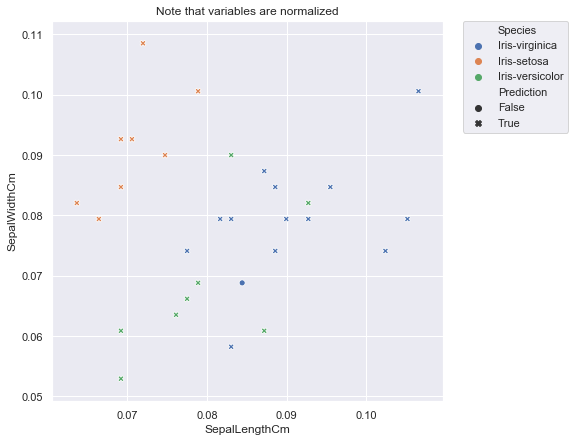

In [111]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Note that variables are normalized')
sns.scatterplot(test.SepalLengthCm, test.SepalWidthCm, hue=test.Species, style=test.Prediction, legend='full' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Other algorithms
Random forest is another method in ML. The procedure for doing RF or NN is pretty similar and the results in this case is rather comparable. But notice that the time needed to train RF is significant shorter.

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(train_x, train_y)
print('RF pred test: ', np.argmax(clf.predict(test_x),axis=1))
print('NN pred test: ', predicted_test)
print('True    test: ', np.argmax(test_y,axis=1))
print()
print('RF pred valid: ', np.argmax(clf.predict(validate_x),axis=1))
print('NN pred valid: ',  predicted_validation)
print('True    valid: ', np.argmax(validate_y,axis=1))


RF pred test:  [2 2 0 1 0 2 2 0 1 2 2 1 1 1 2 2 1 1 2 0 0 2 1 0 1 0 0 2 1 2]
NN pred test:  [2 2 0 2 0 2 2 0 1 2 2 1 1 1 2 2 1 1 2 0 0 2 1 0 1 0 0 2 1 2]
True    test:  [2 2 0 2 0 2 2 0 1 2 2 1 1 1 2 2 2 1 2 0 0 2 1 0 1 0 0 2 1 2]

RF pred valid:  [2 1 1 2 0 1 0 0 2 1 0 2 2 2 0 1 2 1 1 0 1 1 1 1 2 1 1 0 0 2]
NN pred valid:  [2 1 1 2 0 1 0 0 2 1 0 2 2 2 0 1 2 1 1 0 1 1 1 1 2 1 1 0 0 2]
True    valid:  [2 1 1 2 0 1 0 0 2 1 0 2 2 2 0 1 2 1 1 0 1 1 1 1 2 2 1 0 0 2]
